# Bank Loan Classification




Here, we have a dataset of bank loans in a spreadsheet(xlsx file). The dataset consists of 15 columns and a target variable(column).

The breif introuction to dataset is as follows:

● ID: ID of the customer.

● Age: Age of the customer

● Gender: M for Male, F for Female and O for Others

● Experience: Amount of work experience in years\

● Income: Amount of annual income (in thousands)

● Home Ownership: Home Owner, Rent and Home Mortgage.

● Zipcode: Postal code in which the client lives

● Family: Number of family members

● CCAvg: Average monthly spending with the credit card (in thousands)

● Education: Education level (1: bachelor's degree, 2: master's degree, 3:
advanced/professional degree)

● Mortgage: Value of home mortgage, if any (in thousands)

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit account (CD) with the
bank?

● Online: Does the customer use the internet banking facilities?

● CreditCard: Does the customer use a credit card issued by the bank?

● Personal Loan: Did this customer accept the personal loan offered in the last campaign?
(Target Variable)




---



# Import required libraries


In [62]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statsmodels
import pickle


# Dataset Exploration

In [63]:
path="/content/drive/MyDrive/BankLoanClassification/Bank_loan_data (1).xlsx"
sheet_name="Data"
bank_df = pd.read_excel(path, sheet_name,index_col=0) # using ID column as the index column.
bank_df.head()


,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,,,
1,25,NaN,1,49.0,91107,4,1.6,1,0,NaN,0,1,0,0.0,0
2,45,NaN,19,34.0,90089,3,1.5,1,0,NaN,0,1,0,0.0,0
3,39,NaN,15,11.0,94720,1,1.0,1,0,NaN,0,0,0,0.0,0
4,35,NaN,9,100.0,94112,1,2.7,2,0,NaN,0,0,0,0.0,0
5,35,NaN,8,45.0,91330,4,1.0,2,0,NaN,0,0,0,0.0,1


In [64]:
bank_df.tail()

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,,,
4996,29,NaN,3,40.0,92697,1,1.9,3,0,NaN,0,0,0,1.0,0
4997,30,NaN,4,15.0,92037,4,0.4,1,85,NaN,0,0,0,1.0,0
4998,63,NaN,39,24.0,93023,2,0.3,3,0,NaN,0,0,0,0.0,0
4999,65,NaN,40,49.0,90034,3,0.5,2,0,NaN,0,0,0,1.0,0
5000,28,NaN,4,83.0,92612,3,0.8,1,0,NaN,0,0,0,1.0,1


In [65]:
# shape of dataframe i.e. rows and columns
bank_df.shape

(5000, 15)

In [66]:
#basic details about the dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Gender              480 non-null    object 
 2   Experience          5000 non-null   int64  
 3   Income              4933 non-null   float64
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Home Ownership      480 non-null    object 
 10  Personal Loan       5000 non-null   object 
 11  Securities Account  5000 non-null   int64  
 12  CD Account          5000 non-null   int64  
 13  Online              4960 non-null   float64
 14  CreditCard          5000 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 625.0+

In [67]:
bank_df.describe(include="all")

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,480,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,480,5000.0,5000.000000,5000.00000,4960.000000,5000.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3.0,NaN,NaN,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home Mortage,0.0,NaN,NaN,NaN,NaN
freq,NaN,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219,4520.0,NaN,NaN,NaN,NaN
mean,46.008200,NaN,20.104600,72.758159,93152.503000,2.396400,1.937913,1.881000,56.498800,NaN,NaN,0.104400,0.06040,0.596976,0.294000
std,25.444898,NaN,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839869,101.713802,NaN,NaN,0.305809,0.23825,0.490555,0.455637
min,0.000000,NaN,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,NaN,NaN,0.000000,0.00000,0.000000,0.000000
25%,35.000000,NaN,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,NaN,NaN,0.000000,0.00000,0.000000,0.000000
50%,45.000000,NaN,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,NaN,NaN,0.000000,0.00000,1.000000,0.000000
75%,55.000000,NaN,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,NaN,NaN,0.000000,0.00000,1.000000,1.000000


# Data Preprocessing

# 1.Dropping Columns
Here, we can see that the column gender has only 480 non-null values out of 5000 entries. This could be because people are not comfortable sharing their gender and chose not to give the information during data collection.

Normally, for missing values imputation could be applied but since the actual data is in very scare quantity imputation may cause the dataset to lose its original characteristics.  Therefore, it makes more sense to completely drop the column instead.

Similar is the case with the case with the column "Home-ownership". Although, this variable may have a noteworthy impact on the target variable, due to the risk of hampering the characteristics of data this column will also be dropped.


In [68]:
bank_df.drop(["Gender", "Home Ownership"], axis=1, inplace=True) # To change the dataframe itself inplace=True is used.
bank_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49.0,91107,4,1.6,1,0,0,1,0,0.0,0
2,45,19,34.0,90089,3,1.5,1,0,0,1,0,0.0,0
3,39,15,11.0,94720,1,1.0,1,0,0,0,0,0.0,0
4,35,9,100.0,94112,1,2.7,2,0,0,0,0,0.0,0
5,35,8,45.0,91330,4,1.0,2,0,0,0,0,0.0,1


The variable "Personal Loan" seems to have three categories instead of expected two. So there seems to be an error in the data.

In [69]:
#Removing the errorenous data.

print(bank_df.value_counts(subset=["Personal Loan"]))

bank_df[bank_df["Personal Loan"]==" "]= np.NaN

print(bank_df["Personal Loan"].unique()) #before dropping

bank_df.dropna(subset=["Personal Loan"], axis=0, inplace=True)

print(bank_df["Personal Loan"].unique()) # afer dropping(printing to check thre result of drop)



Personal Loan
0                4520
1                 479
                    1
dtype: int64
[0 1 nan]
[0 1]



# 2.Renaming Columns
 For the given dataset, there is no need for checking duplicate entries because the nature of variables allows for duplicates.

Here, the columns "Income", "CCAVG" and "Home Mortgage" have their values described in thousands. So, this information is being added in respective column names for more clarity.

In [70]:
bank_df.rename(columns={"Income": "Income(in thousands)",
                         "CCAvg": "CCAvg(in thousands)",
                         "Mortgage":"Mortgage(in thousands)",}, inplace=True)

# 3. Changing data types
Here, the data type of "ZIP Code" is "int64" but since we cannot perform any meaningful mathematical arithmetic computation with this variable, the data type of this variable is changed to "object" type.

Also, the "Education" variable is shown as of type "int64" while it is a categorical variable so converting type of "Education" as well

Similarly, the variables "Securities Account", "CD Account", "Online" and "CreditCard" are also going to be changed to categorical type.

Finally, the target variable "Personal Loan" is also being changed to categorial type.


In [71]:
processed_df=bank_df.astype({"ZIP Code":"object",
                "Education": "category",
                "Securities Account": "category",
                "CD Account":"category",
                "Online":"category",
                "CreditCard": "category",
                "Personal Loan":"category"},)
processed_df.dtypes

Age                        float64
Experience                 float64
Income(in thousands)       float64
ZIP Code                    object
Family                     float64
CCAvg(in thousands)        float64
Education                 category
Mortgage(in thousands)     float64
Personal Loan             category
Securities Account        category
CD Account                category
Online                    category
CreditCard                category
dtype: object

# 4.Handling Empty Values


In [72]:
processed_df["Online"].fillna( method="backfill",inplace=True)
processed_df["Income(in thousands)"].fillna(processed_df["Income(in thousands)"].mean(), inplace=True)


# 5. Handling Outliers


In [73]:
processed_df= processed_df[(processed_df["Age"]>= 18) & (processed_df["Age"]<=100)]

processed_df =processed_df[processed_df["Experience"]>=0]

# Descriptive Statistics

In [74]:
processed_df.describe(include="all")

,Age,Experience,Income(in thousands),ZIP Code,Family,CCAvg(in thousands),Education,Mortgage(in thousands),Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4934.000000,4934.000000,4934.000000,4934.0,4934.000000,4934.000000,4934.0,4934.000000,4934.0,4934.0,4934.0,4934.0,4934.0
unique,NaN,NaN,NaN,467.0,NaN,NaN,3.0,NaN,2.0,2.0,2.0,2.0,2.0
top,NaN,NaN,NaN,94720.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,1.0,0.0
freq,NaN,NaN,NaN,164.0,NaN,NaN,2078.0,NaN,4468.0,4419.0,4636.0,2940.0,3483.0
mean,45.571544,20.333401,72.549097,NaN,2.389947,1.929597,NaN,56.413660,NaN,NaN,NaN,NaN,NaN
std,11.345845,11.312065,44.988309,NaN,1.148576,1.741221,NaN,101.373342,NaN,NaN,NaN,NaN,NaN
min,24.000000,0.000000,8.000000,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,36.000000,11.000000,39.000000,NaN,1.000000,0.700000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,46.000000,20.000000,64.000000,NaN,2.000000,1.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,55.000000,30.000000,93.750000,NaN,3.000000,2.500000,NaN,101.000000,NaN,NaN,NaN,NaN,NaN


# Data Visualization


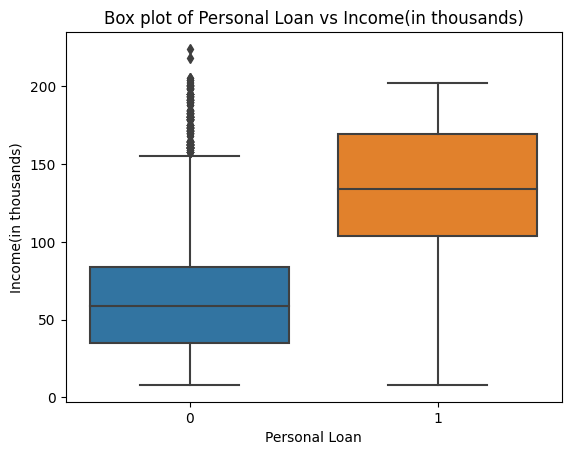

In [75]:
ax=sns.boxplot(data=processed_df, x="Personal Loan", y="Income(in thousands)")
plt.title("Box plot of Personal Loan vs Income(in thousands)")
plt.show()

From the box plot we can assume that generally people with high income are likely to get personal loan.

Text(0.5, 1.0, 'Box plot of Personal Loan vs Experience')

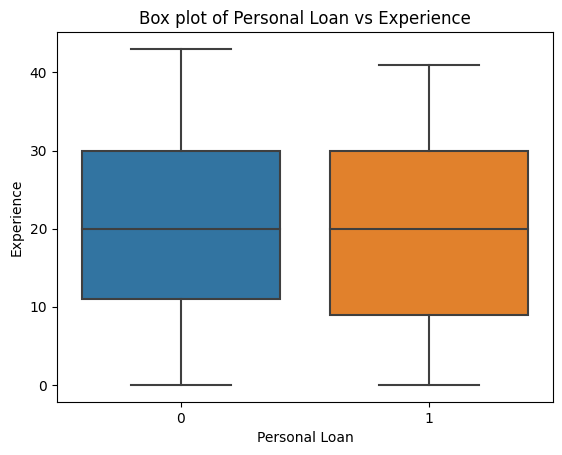

In [76]:
ax=sns.boxplot(data=processed_df, x="Personal Loan", y="Experience")
plt.title("Box plot of Personal Loan vs Experience")


In this case, we can see that "Experience" has no really significant chance in one getting a "Personal Loan"

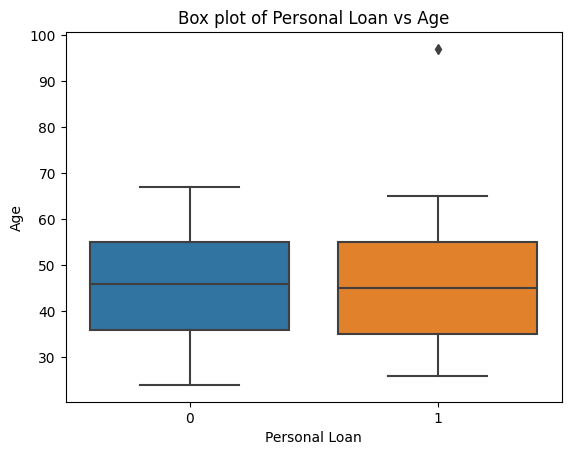

In [77]:
ax=sns.boxplot(data=processed_df, x="Personal Loan", y="Age")
plt.title("Box plot of Personal Loan vs Age")
plt.show()

Here,also we can see that Age doesnot make a difference in the chances pf getting a loan.

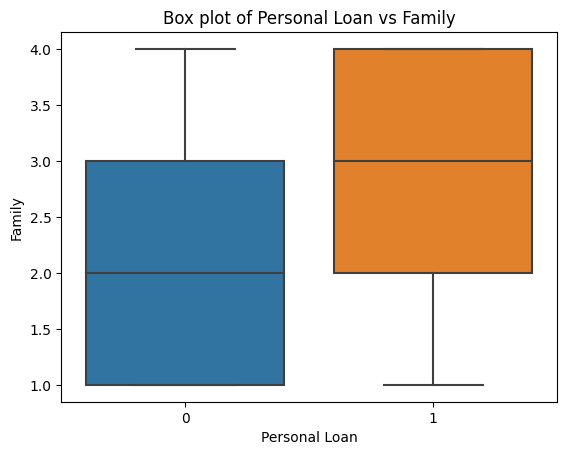

In [78]:
ax=sns.boxplot(data=processed_df, x="Personal Loan", y="Family")
plt.title("Box plot of Personal Loan vs Family")
plt.show()

So, the bank is more likely to offer loan if you have more family members.

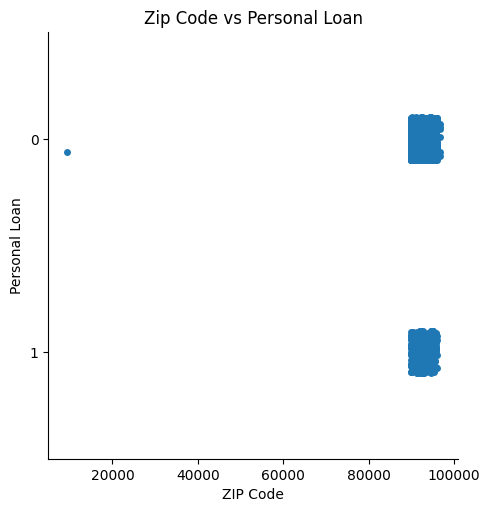

In [79]:
ax=sns.catplot(data=processed_df, x="ZIP Code", y="Personal Loan")
plt.title("Zip Code vs Personal Loan")
plt.show()

Here also we can see that the zip codes doesnt have a significant imapact in someone getting a loan.

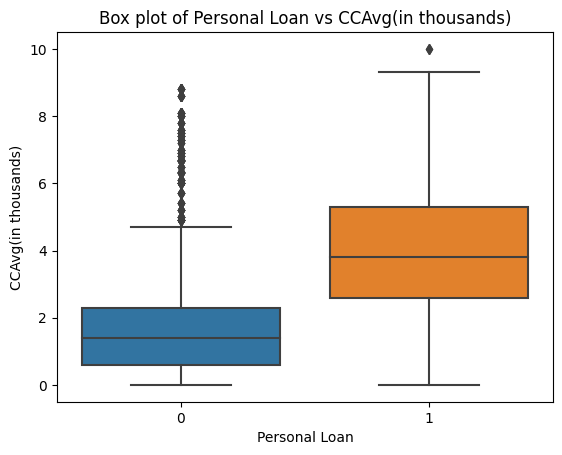

In [80]:
ax=sns.boxplot(data=processed_df, x="Personal Loan", y="CCAvg(in thousands)")
plt.title("Box plot of Personal Loan vs CCAvg(in thousands)")
plt.show()

From this plot we can note that it is more likely to get a Personal loan if you have an higher CCAvg.

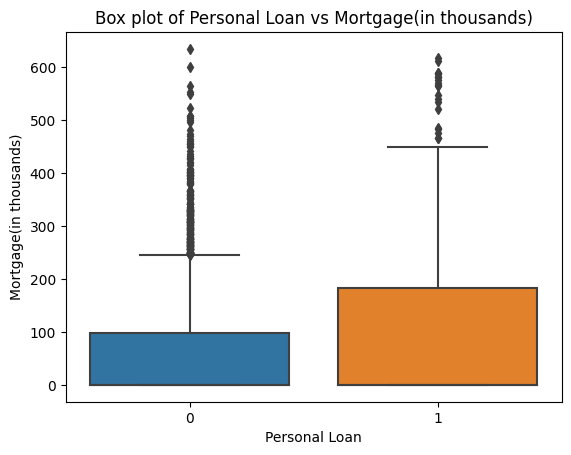

In [81]:
ax=sns.boxplot(data=processed_df, x="Personal Loan", y="Mortgage(in thousands)")
plt.title("Box plot of Personal Loan vs Mortgage(in thousands)")
plt.show()

There seems to be a slight correlation between Mortgage and Personal Loan. The persons who have loan appear to have higher mortgage

In [82]:
rows=["Securities Account", "Online", "CreditCard", "CD Account"]
for row in rows:
  crosstab=pd.crosstab(processed_df[row], processed_df["Personal Loan"])
  print(crosstab ,"\n")


Personal Loan          0    1
Securities Account           
0.0                 4012  407
1.0                  456   59 

Personal Loan     0    1
Online                  
0.0            1805  189
1.0            2663  277 

Personal Loan     0    1
CreditCard              
0.0            3156  327
1.0            1312  139 

Personal Loan     0    1
CD Account              
0.0            4306  330
1.0             162  136 



# MODEL DEVELOPMENT


In [101]:
#seperating the features and the target variable.
#feature1=["Income(in thousands)","CCAvg(in thousands)","Family", "Mortgage(in thousands)", "Securities Account","Online", "CD Account","CreditCard"]
#feature2=["Income(in thousands)","CCAvg(in thousands)", "Family", "Mortgage(in thousands)", ]
#X= processed_df[feature]

X=processed_df.drop("Personal Loan", axis=1)
y=processed_df["Personal Loan"]
X.head()

,Age,Experience,Income(in thousands),ZIP Code,Family,CCAvg(in thousands),Education,Mortgage(in thousands),Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0
2,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0
3,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0
5,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0


In [102]:
#Splitting the Dataset into train and validation sets.
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, train_size=0.8, test_size=0.2)

In [103]:
#Model Selection
#Model 1

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

model1=HistGradientBoostingClassifier() #  accept missing values encoded as NaNs natively
model1.fit(train_X,train_y)
predictions=model1.predict(val_X)
print(accuracy_score(predictions,val_y))

#using all the columns of processed_df value of accuracy score was 0.9837.
#using only the listed features the accuracy score was found to be 0.9452.
#using only the numerical variables from the listed features accuracy score of 0.9442 was acheived.




0.983789260385005


Here, we acheived accuarcy of 0.989, which is incredibly high so there is a concern of overfitting.

In [104]:
#Model 2

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model2=DecisionTreeClassifier()
model2.fit(train_X,train_y)
predictions=model2.predict(val_X)
print(accuracy_score(predictions,val_y))

#Accuracy of 0.9807 for full processed_df dataframe.
#Accuracy using only the numerical variables of listed features was found to be 0.9513.
#Accuracy using only the listed feeatures was found to be 0.9351.

0.9807497467071935


In [105]:
#Model 3
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model3=RandomForestClassifier(n_estimators=100, max_depth=10) #  accept missing values encoded as NaNs natively
model3.fit(train_X,train_y)
predictions=model3.predict(val_X)
print(accuracy_score(predictions,val_y))

#Accuracy of 0.9767 for full processed_df dataframe.
#Accuracy of 0.9493 for the numerical variables of the listed feature.
#Accuracy of 0.9503 for the listed features.

0.9807497467071935


Using  3 different models and 3 different feature set, the accuracy  was found to be similar. The highest accuracy was acheived when the full processed_df was passed as features in each case. So, using this case for  the final model.

# Saving Models

In [108]:
#Saving all models
models=[model1, model2, model3]

for model in models:
  path=f"/content/drive/MyDrive/BankLoanClassification/{model}.pkl"
  file= open(path,"wb")
  pickle.dump(model, file)
  file.close()

